# Social Network Analysis

# 1. Graph Representation


In [1]:
import networkx as nx

# Example data: list of edges (user1, user2)
edges = [
    ('Alice', 'Bob'),
    ('Alice', 'Carol'),
    ('Bob', 'Carol'),
    ('Carol', 'Dave'),
    ('Dave', 'Eve'),
    ('Eve', 'Frank'),
    ('Frank', 'Alice')
]

# Create a graph
G = nx.Graph()
# Add edges to the graph
G.add_edges_from(edges)



# 2. Centrality Measures

In [2]:
#Calculate various centrality measures to identify key users in the network.
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Display the centrality measures
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)


Degree Centrality: {'Alice': 0.6000000000000001, 'Bob': 0.4, 'Carol': 0.6000000000000001, 'Dave': 0.4, 'Eve': 0.4, 'Frank': 0.4}
Betweenness Centrality: {'Alice': 0.25, 'Bob': 0.0, 'Carol': 0.25, 'Dave': 0.15000000000000002, 'Eve': 0.1, 'Frank': 0.15000000000000002}
Closeness Centrality: {'Alice': 0.7142857142857143, 'Bob': 0.5555555555555556, 'Carol': 0.7142857142857143, 'Dave': 0.625, 'Eve': 0.5555555555555556, 'Frank': 0.625}


# 3. Community Detection

In [5]:
!pip install python-louvain
import community as community_louvain

# Apply the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Display the detected communities
print("Communities:", partition)


Communities: {'Alice': 1, 'Bob': 1, 'Carol': 1, 'Dave': 0, 'Eve': 0, 'Frank': 0}


# 4. Visualization

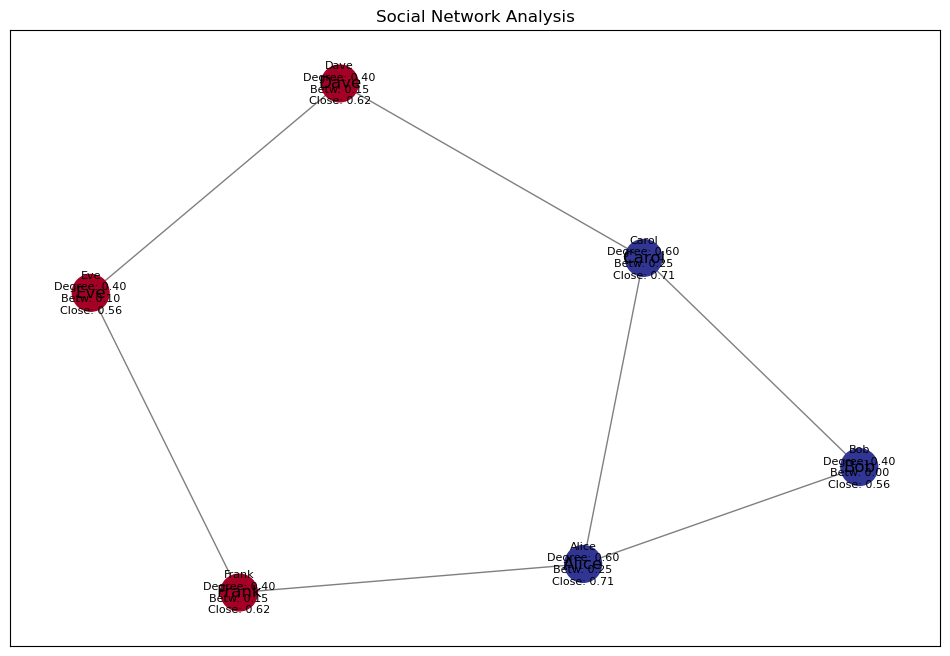

In [6]:
#Visualize the network using a graph visualization library like Matplotlib with NetworkX.
import matplotlib.pyplot as plt

# Define position layout for nodes
pos = nx.spring_layout(G)

# Draw the network
plt.figure(figsize=(12, 8))

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))

# Edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Display the centrality measure for each node
node_labels = {node: f'{node}\nDegree: {degree_centrality[node]:.2f}\nBetw: {betweenness_centrality[node]:.2f}\nClose: {closeness_centrality[node]:.2f}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

plt.title("Social Network Analysis")
plt.show()
